## (E1) 가위바위보 분류기 만들기

## 1.데이터 만들기    
   [teachable machine](https://teachablemachine.withgoogle.com/)을 사용
   하여 가위, 바위, 보 이미지를 찍는다. 다양한 각도와 크기로 찍어 다운로드한다.   

## 2. 디렉토리 만들기
실습용 디렉토리 ```rock_scissor_paper```와 하위 디렉토리 ```rock```, ```scissor```, ```paper```를 만들고, 그 안에 다운로드 받은 가위, 바위, 보 이미지를 각각의 디렉토리에 넣는다. 

## 3. 데이터를 불러온 후, 이미지 Resize 하기 
이미지를 가지고 온 후, PIL 라이브러리를 사용하여 가위, 바위, 보 이미지를 28x28로 만든다.

In [1]:
from PIL import Image # PIL 라이브러리 
import os, glob

# 가위 이미지
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

# 바위 이미지

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

# 보 이미지
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

가위 이미지 resize 완료!
바위 이미지 resize 완료!
보 이미지 resize 완료!


## 4.  학습 데이터 준비

학습데이터(x_train)의 이미지 개수는 9301 입니다.


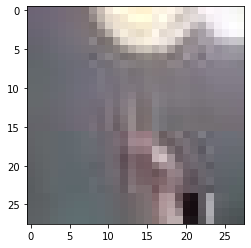

학습 데이터  4 번째 이미지의 라벨은 바로  0 입니다.
x_train norm shape: (9600, 28, 28, 3)
y_train norm shape: (9600,)


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# load_data() 함수 만들기
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=9600 # 가위바위보 이미지 개수 총합에 주의
    img_size=28
    color=3  # 컬러 이미지 RGB
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

# 학습 데이터 경로 설정 
image_dir_train = os.getenv("HOME") + "/aiffel/rock_scissor_paper"

# 학습 데이터 불러오기 
(x_train, y_train)=load_data(image_dir_train)

# 데이터 전처리 - 학습 데이터를 0~1 사이의 값으로 정규화
x_train_norm = x_train/255.0   

# 학습 데이터 Reshape
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  

# 데이터가 잘 로드되었는지 확인하기 위해서 이미지 하나를 출력해 본다.

index = 3
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()

print("학습 데이터 ", (index+1), "번째 이미지의 라벨은 바로 ", y_train[index], "입니다.")
print("x_train norm shape: {}".format(x_train_norm.shape))
print("y_train norm shape: {}".format(y_train.shape))


- 주의할 점      
가위, 바위, 보 이미지의 개수 총합을 주의해야 한다. 개수 총합이 달라지면 error message가 나온다. 
- 모르겠는 부분    
missing data가 300개 정도 생겨서 이미지 파일을 바꿔 보았지만 변화가 없었다. missing data가 된 이미지 파일이 무엇인지 궁금하다.

#### Q. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

가위바위보 데이터셋은 MNIST 데이터 셋과 달리 컬러이므로 이미지의 형태 마지막 부분을 __1__ 이 아니라 __3__ 으로 바꿔야 한다. 또한 가위바위보 데이터셋은 클래스가 _가위, 바위, 보_ 로 __3__개이다. 

## 5. 딥러닝 네트워크 설계 - Sequenential Model (LeNet)

In [3]:
# Hyperparameter

n_channel_1=64
n_channel_2=128
n_dense=256
n_train_epoch=20

# Model에 추가된 Layer
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               819456    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 7

- 주의할 점        
  1. 2번째 레이어의 input_shape=(28,28,3)에서 마지막 숫자를 잘 보아야 한다. 흑백 이미지에서는 1, 컬러 이미지에서는 3으로 바꿔 주어야 한다. 여기서는 입력 이미지가 컬러 이미지이므로 3으로 바꿔 주었다.       
  2. 마지막 레이어 model.add(keras.layers.Dense(3, activation='softmax'))에서 숫자는 분류기의 class 수를 의미한다. 여기서는 '가위, 바위, 보'의 3개 class이므로 3으로 바꿔 주었다. 

## 6. 딥러닝 네트워크 학습

In [4]:
# 모델 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


model.fit(x_train_reshaped, y_train, epochs= n_train_epoch)

Epoch 1/20
300/300 [==============================] - 1s 2ms/step - loss: 0.8005 - accuracy: 0.6222
Epoch 2/20
300/300 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8348
Epoch 3/20
300/300 [==============================] - 1s 2ms/step - loss: 0.2478 - accuracy: 0.9080
Epoch 4/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1472 - accuracy: 0.9479
Epoch 5/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9677
Epoch 6/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0694 - accuracy: 0.9780
Epoch 7/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9885
Epoch 8/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9858
Epoch 9/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9883
Epoch 10/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9862

## 7. 테스트 데이터로 성능 확인

### 1) 테스트용 데이터 만들기


In [5]:
## load_data() 함수 만들기

def load_data(img_path1):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=1002 # 가위바위보 이미지 개수 총합에 주의
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path1+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path1+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path1+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

# 태스트 데이터 경로 설정 
image_dir_test = os.getenv("HOME") + "/aiffel/test"

# 테스트 데이터 불러오기 
(x_test, y_test)=load_data(image_dir_test)

# 데이터 전처리 - 테스트 데이터를 0~1 사이의 값으로 정규화
x_test_norm = x_test/255.0   

# 테스트 데이터 Reshape

x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)


print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


테스트데이터(x_test)의 이미지 개수는 1002 입니다.
x_test shape: (1002, 28, 28, 3)
y_test shape: (1002,)


### 2) 테스트 데이터 측정

In [6]:
# 테스트 데이터 측정

test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

32/32 - 2s - loss: 2.7702 - accuracy: 0.7345
test_loss: 2.7702035903930664 
test_accuracy: 0.7345309257507324


## 회고

- 이번 프로젝트에서 어려웠던 점    
  1. 이렇게 긴 코드를 써본 적이 없어서 처음에는 당황했다. 노드에서 시키는 대로 할 때와 달리 한 번에 끝까지 써야 해서, 어디에 무엇을 넣어야 하는지 한참을 헤맸다. 다시 노드를 보면서 하나씩 살펴보며 코드를 수정해 나갔다.
  2. 이 프로젝트에서 시간이 가장 많이 걸린 부분은 데이터를 모으는 부분이었다. 퍼실님께서 30명의 데이터를 모아 보라는 말도 지나가듯 하셔서 9천 개의 학습데이터를 모으느라 시간이 많이 걸렸다. 금방 끝날 줄 알았는데, 생각보다 오래 걸렸고 다운로드한 폴더들이 혼동되어서 헛수고도 몇 번 했다. 다음부터는 조원들과 나누어서 데이터를 수집해야 겠다. 또한 학습데이터에서 missing data가 생겨서 이 부분을 해결해보느라 시간이 걸렸다. 어떤 이미지 파일이 missing data인지 결국 찾지 못해서 데이터를 추가하였다.
  3. 하이퍼파라미터를 정하는 부분에서도 고민이 많이 되었다. 처음 테스트해 보았을 때(n_channel_1=16, n_channel_2=64, n_dense=32, n_train_epoch=32)의 정확도는 68%가 나왔다. 더 좋은 결과를 얻기 위해서 여러 번 시도를 해 보았다.
  
  
- 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점.  
  1. 코드를 무작정 갖다 쓰다 보니 처음에는 에러가 많이 났다. 코드를 쓰기 전에 사용할 패키지가 뭔지, 변경해야 할 변수나 조건이 무엇인지 명확히 알고 실행부터 시켜야 함을 깨달았다. 
  2. 이론으로만 배웠던 하이퍼파라미터를 결정하는 방법을 직접 해보니 막연하게 느껴졌던 부분이 이해되었다. 눈으로만 볼 때는 그냥 넘어갔던 부분도 직접 해보고 다시 보니 어떤 의미인지 알게 되었다. 하지만 아직도 가장 좋은 하이퍼파라미터를 결정하는 방법은 잘 모르겠다. 이것저것 넣어서 결정하는 방법 말고 다른 방법은 없을까? 학습데이터를 많이 모았지만 테스트 결과가 예상보다 좋지 않아 아쉽다. 
  3. 코드 내의 설정 부분은 아직 이해가 안 된다. 그중 한 예를 들면, 2번 layer에서 ```'relu'```나 ```(3,3)```의 의미를 잘 모르겠다.      


- 루브릭 평가 지표를 맞추기 위해 시도한 것들     
    * 오버피팅을 해결하기 위하여 다양한 데이터를 수집하였고, 데이터를 정규화하였다.  
    * test accuracy가 60% 이상이 나오도록 데이터를 할 수 있는 한 많이 모았고, 여러 번의 시도를 통해 좋은 결과를 얻도록 노력하였다. 
     
     
- 자기 다짐   
  처음이라 그런지 많이 헤맸던 프로젝트였다. 혼자서 할 때는 시행착오가 많아서 에러 메시지도 많이 뜨고 그것을 해결하는 시간도 많이 걸렸다. 그러나 이런 과정을 통해 공부할 때 놓쳤던 부분에 대해 조금 더 자세히 알게 되었다. 
  이번 프로젝트를 기회로 어떻게 노드를 공부해야 하는지에 대해 조금은 알게 된 것 같다. 어느 부분에서 주의를 기울여야 할지, 그 의미가 무엇인지에 대해 다음부터는 생각을 하면서 공부해서 실수를 줄이고 싶다. 또한 진표님께서 보여주신 방법을 통해서 어떻게 프로젝트를 해야 하는지 알았기 때문에 다음부터는 시간을 단축시킬 수 있을 것 같다. 